# Detecting COVID-19 with Chest X Ray using PyTorch

Image classification of Chest X Rays in one of three classes: Normal, Viral Pneumonia, COVID-19

Dataset from [COVID-19 Radiography Dataset](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database) on Kaggle



# Importing Libraries

In [1]:
%matplotlib inline

import os
import torch
import random
import torchvision
import numpy as np
import pandas as pd

from PIL import Image
from matplotlib import pyplot as plt
from IPython.display import clear_output

torch.manual_seed(0)

print('Using PyTorch version', torch.__version__)

Using PyTorch version 1.7.0+cu101


# Load Datasets
## COVID-19

In [2]:
covid_df = pd.read_csv('../datasets/normal-viral-covid19/COVID-19.metadata.csv')
images_dir = '../datasets/normal-viral-covid19/covid'
images = [x for x in os.listdir(images_dir)[:300] if x[-3:].lower().endswith('png')]
images_map = {image.replace(' ', '').split('.')[0]: image for image in images}

covid_df['PATH'] = covid_df.apply(lambda col: '%s/%s' % (images_dir, images_map[col['FILE NAME']]), axis=1)
covid_df

FILE NAME FORMAT       SIZE  \
0      COVID-19(1)    PNG  1024*1024   
1      COVID-19(2)    PNG  1024*1024   
2      COVID-19(3)    PNG  1024*1024   
3      COVID-19(4)    PNG  1024*1024   
4      COVID-19(5)    PNG  1024*1024   
..             ...    ...        ...   
268  COVID-19(269)    PNG        NaN   
269  COVID-19(270)    PNG        NaN   
270  COVID-19(271)    PNG        NaN   
271  COVID-19(272)    PNG        NaN   
272  COVID-19(273)    PNG        NaN   

                                                   URL  \
0    https://www.sciencedirect.com/science/article/...   
1    https://www.sciencedirect.com/science/article/...   
2    https://www.sciencedirect.com/science/article/...   
3    https://www.sciencedirect.com/science/article/...   
4    https://www.sciencedirect.com/science/article/...   
..                                                 ...   
268                                            serial1   
269                                            serial2   
270                                            serial3   
271                                            serial4   
272                                            serial5   

                                                  PATH  
0    ../datasets/normal-viral-covid19/covid/COVID-1...  
1    ../datasets/normal-viral-covid19/covid/COVID-1...  
2    ../datasets/normal-viral-covid19/covid/COVID-1...  
3    ../datasets/normal-viral-covid19/covid/COVID-1...  
4    ../datasets/normal-viral-covid19/covid/COVID-1...  
..                                                 ...  
268  ../datasets/normal-viral-covid19/covid/COVID-1...  
269  ../datasets/normal-viral-covid19/covid/COVID-1...  
270  ../datasets/normal-viral-covid19/covid/COVID-1...  
271  ../datasets/normal-viral-covid19/covid/COVID-1...  
272  ../datasets/normal-viral-covid19/covid/COVID-1...  

[273 rows x 5 columns]

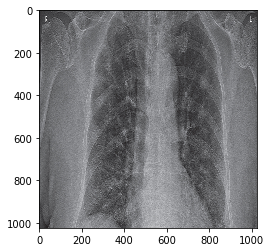

In [3]:
im_frame = Image.open(covid_df.at[0, 'PATH'])
                                    
np_frame = np.array(im_frame)
plt.imshow(np_frame)

## COVID-19 Valencia

In [4]:
valencia_covid_df = pd.read_csv('../datasets/bimcv-covid19/bimcv-covid19.csv', index_col=0)

valencia_covid_df

Subject     Session      Date   Age Sex  \
0     sub-S03533  ses-E07501  20200328  052Y   M   
1     sub-S03533  ses-E07501  20200328  052Y   M   
2     sub-S03909  ses-E08005  20200330   NaN   M   
3     sub-S03711  ses-E07526  20200322   NaN   F   
4     sub-S03711  ses-E07526  20200322   NaN   F   
...          ...         ...       ...   ...  ..   
3032  sub-S03288  ses-E07142  20200310   NaN   F   
3033  sub-S03288  ses-E06470  20200222   NaN   F   
3034  sub-S03288  ses-E06470  20200222   NaN   F   
3035  sub-S03492  ses-E07022  20200311   NaN   F   
3036  sub-S03492  ses-E07022  20200311   NaN   F   

                                               Filename  \
0     mod-rx/sub-S03533_ses-E07501_bp-chest_run-1_cr...   
1     mod-rx/sub-S03533_ses-E07501_bp-chest_run-2_cr...   
2     mod-rx/sub-S03909_ses-E08005_bp-chest_run-1_vp...   
3     mod-rx/sub-S03711_ses-E07526_bp-chest_run-1_ac...   
4     mod-rx/sub-S03711_ses-E07526_bp-chest_run-1_ac...   
...                                                 ...   
3032  mod-rx/sub-S03288_ses-E07142_bp-chest_run-1_vp...   
3033  mod-rx/sub-S03288_ses-E06470_bp-chest_run-1_ac...   
3034  mod-rx/sub-S03288_ses-E06470_bp-chest_run-1_ac...   
3035  mod-rx/sub-S03492_ses-E07022_bp-chest_run-1_vp...   
3036  mod-rx/sub-S03492_ses-E07022_bp-chest_run-1_vp...   

                                                   Path Is frontal  
0     ../datasets/bimcv-covid19/sub-S03533/ses-E0750...          y  
1     ../datasets/bimcv-covid19/sub-S03533/ses-E0750...          y  
2     ../datasets/bimcv-covid19/sub-S03909/ses-E0800...          y  
3     ../datasets/bimcv-covid19/sub-S03711/ses-E0752...          y  
4     ../datasets/bimcv-covid19/sub-S03711/ses-E0752...          n  
...                                                 ...        ...  
3032  ../datasets/bimcv-covid19/sub-S03288/ses-E0714...          y  
3033  ../datasets/bimcv-covid19/sub-S03288/ses-E0647...          y  
3034  ../datasets/bimcv-covid19/sub-S03288/ses-E0647...          n  
3035  ../datasets/bimcv-covid19/sub-S03492/ses-E0702...          y  
3036  ../datasets/bimcv-covid19/sub-S03492/ses-E0702...          n  

[3037 rows x 8 columns]

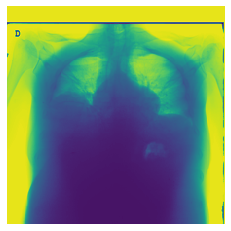

In [5]:
im_frame = Image.open(valencia_covid_df.at[0, 'Path']).resize((224, 224))
                                    
np_frame = np.array(im_frame)
plt.imshow(np_frame)
plt.axis('off')
plt.savefig('a.jpg', bbox_inches='tight')

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(Image.open(valencia_covid_df.at[0, 'Path']))
# save the image
plt.imsave('a.jpg', data)

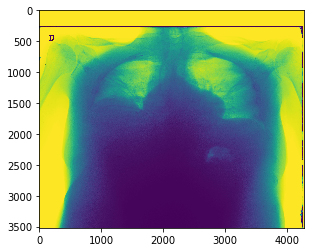

In [7]:
im_frame = Image.open('a.jpg').convert('RGB')
                                    
np_frame = np.array(im_frame)
ax = plt.imshow(np_frame)

## Normal

In [8]:
normal_df = pd.read_csv('../datasets/normal-viral-covid19/NORMAL.metadata.csv')
images_dir = '../datasets/normal-viral-covid19/normal/'

normal_df['PATH'] = normal_df.apply(lambda col: '%s/%s).png' % (images_dir, col['FILE NAME'].replace('-', ' (')), axis=1)
normal_df

FILE NAME FORMAT       SIZE  \
0        NORMAL-1    PNG  1024*1024   
1        NORMAL-2    PNG  1024*1024   
2        NORMAL-3    PNG  1024*1024   
3        NORMAL-4    PNG  1024*1024   
4        NORMAL-5    PNG  1024*1024   
...           ...    ...        ...   
1336  NORMAL-1337    PNG  1024*1024   
1337  NORMAL-1338    PNG  1024*1024   
1338  NORMAL-1339    PNG  1024*1024   
1339  NORMAL-1340    PNG  1024*1024   
1340  NORMAL-1341    PNG  1024*1024   

                                                    URL  \
0     https://www.kaggle.com/paultimothymooney/chest...   
1     https://www.kaggle.com/paultimothymooney/chest...   
2     https://www.kaggle.com/paultimothymooney/chest...   
3     https://www.kaggle.com/paultimothymooney/chest...   
4     https://www.kaggle.com/paultimothymooney/chest...   
...                                                 ...   
1336  https://www.kaggle.com/paultimothymooney/chest...   
1337  https://www.kaggle.com/paultimothymooney/chest...   
1338  https://www.kaggle.com/paultimothymooney/chest...   
1339  https://www.kaggle.com/paultimothymooney/chest...   
1340  https://www.kaggle.com/paultimothymooney/chest...   

                                                   PATH  
0     ../datasets/normal-viral-covid19/normal//NORMA...  
1     ../datasets/normal-viral-covid19/normal//NORMA...  
2     ../datasets/normal-viral-covid19/normal//NORMA...  
3     ../datasets/normal-viral-covid19/normal//NORMA...  
4     ../datasets/normal-viral-covid19/normal//NORMA...  
...                                                 ...  
1336  ../datasets/normal-viral-covid19/normal//NORMA...  
1337  ../datasets/normal-viral-covid19/normal//NORMA...  
1338  ../datasets/normal-viral-covid19/normal//NORMA...  
1339  ../datasets/normal-viral-covid19/normal//NORMA...  
1340  ../datasets/normal-viral-covid19/normal//NORMA...  

[1341 rows x 5 columns]

## Viral

In [9]:
viral_df = pd.read_csv('../datasets/normal-viral-covid19/' + 'Viral Pneumonia.matadata.csv')
images_dir = '../datasets/normal-viral-covid19/viral/'

viral_df['PATH'] = viral_df.apply(lambda col: '%s/%s).png' % (images_dir, col['FILE NAME'].replace('-', ' (')), axis=1)
viral_df

FILE NAME FORMAT       SIZE  \
0        Viral Pneumonia-1    PNG  1024*1024   
1        Viral Pneumonia-2    PNG  1024*1024   
2        Viral Pneumonia-3    PNG  1024*1024   
3        Viral Pneumonia-4    PNG  1024*1024   
4        Viral Pneumonia-5    PNG  1024*1024   
...                    ...    ...        ...   
1340  Viral Pneumonia-1341    PNG  1024*1024   
1341  Viral Pneumonia-1342    PNG  1024*1024   
1342  Viral Pneumonia-1343    PNG  1024*1024   
1343  Viral Pneumonia-1344    PNG  1024*1024   
1344  Viral Pneumonia-1345    PNG  1024*1024   

                                                    URL  \
0     https://www.kaggle.com/paultimothymooney/chest...   
1     https://www.kaggle.com/paultimothymooney/chest...   
2     https://www.kaggle.com/paultimothymooney/chest...   
3     https://www.kaggle.com/paultimothymooney/chest...   
4     https://www.kaggle.com/paultimothymooney/chest...   
...                                                 ...   
1340  https://www.kaggle.com/paultimothymooney/chest...   
1341  https://www.kaggle.com/paultimothymooney/chest...   
1342  https://www.kaggle.com/paultimothymooney/chest...   
1343  https://www.kaggle.com/paultimothymooney/chest...   
1344  https://www.kaggle.com/paultimothymooney/chest...   

                                                   PATH  
0     ../datasets/normal-viral-covid19/viral//Viral ...  
1     ../datasets/normal-viral-covid19/viral//Viral ...  
2     ../datasets/normal-viral-covid19/viral//Viral ...  
3     ../datasets/normal-viral-covid19/viral//Viral ...  
4     ../datasets/normal-viral-covid19/viral//Viral ...  
...                                                 ...  
1340  ../datasets/normal-viral-covid19/viral//Viral ...  
1341  ../datasets/normal-viral-covid19/viral//Viral ...  
1342  ../datasets/normal-viral-covid19/viral//Viral ...  
1343  ../datasets/normal-viral-covid19/viral//Viral ...  
1344  ../datasets/normal-viral-covid19/viral//Viral ...  

[1345 rows x 5 columns]

# Creating Custom Dataset

In [10]:
class ChestXRayDataset(torch.utils.data.Dataset):
    def __init__(self, images, transform):
        
        self.images = images
        self.class_names = ['normal', 'viral', 'covid']
        self.transform = transform
    
    def __len__(self):
        return sum([len(self.images[class_name]) for class_name in self.class_names])
    
    def __getitem__(self, index):
        all_images = self.images[self.class_names[0]] \
          + self.images[self.class_names[1]] \
          + self.images[self.class_names[2]]
        all_class_names = [self.class_names[0]]*len(self.images[self.class_names[0]]) \
          + [self.class_names[1]]*len(self.images[self.class_names[1]]) \
          + [self.class_names[2]]*len(self.images[self.class_names[2]])
        image_path = all_images[index]
        class_name = all_class_names[index]
        image = Image.open(image_path)
        if 'bimcv' in image_path:
            data = np.array(Image.open(image_path))
            # save the image
            plt.imsave(image_path.replace('png','jpg'), data)
            image = Image.open(image_path.replace('png','jpg'))
        return self.transform(image.convert('RGB')), self.class_names.index(class_name)

# Image Transformations

In [11]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Prepare DataLoader

In [12]:
len_covid = len(covid_df)
len_viral = len(viral_df)
len_normal = len(normal_df)

In [13]:
train_dirs = {
    'normal': list(normal_df['PATH'].values[:int(len_normal*0.8)]),
    'viral': list(viral_df['PATH'].values[:int(len_viral*0.8)]),
    'covid': list(covid_df['PATH'].values[:int(len_covid*0.8)]) + list(valencia_covid_df['Path'].values[:int((len_normal-len_covid)*0.8)])
}

train_dataset = ChestXRayDataset(train_dirs, transform)

In [14]:
for item in train_dirs.values():
    print(len(item))

1072
1076
1072


In [15]:
dev_dirs = {
    'normal': list(normal_df['PATH'].values[int(len_normal*0.8):int(len_normal*0.9)]),
    'viral': list(viral_df['PATH'].values[int(len_viral*0.8):int(len_viral*0.9)]),
    'covid': list(covid_df['PATH'].values[int(len_covid*0.8):int(len_covid*0.9)]) + list(valencia_covid_df['Path'].values[int((len_normal-len_covid)*0.8):int((len_normal-len_covid)*0.9)])
}

dev_dataset = ChestXRayDataset(dev_dirs, transform)

In [16]:
for item in dev_dirs.values():
    print(len(item))

134
134
134


In [17]:
test_dirs = {
    'normal': list(normal_df['PATH'].values[int(len_normal*0.9):]),
    'viral': list(viral_df['PATH'].values[int(len_viral*0.9):]),
    'covid': list(covid_df['PATH'].values[int(len_covid*0.9):]) + list(valencia_covid_df['Path'].values[int((len_normal-len_covid)*0.8):int((len_normal-len_covid)*0.9)])
}

test_dataset = ChestXRayDataset(test_dirs, transform)

In [18]:
for item in test_dirs.values():
    print(len(item))

135
135
135


In [19]:
batch_size = 24

dl_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dl_dev = torch.utils.data.DataLoader(dev_dataset, batch_size=batch_size, shuffle=True)
dl_test = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

print('Number of training batches', len(dl_train))
print('Number of dev batches', len(dl_dev))
print('Number of test batches', len(dl_test))

Number of training batches 135
Number of dev batches 17
Number of test batches 17


# Data Visualization

In [20]:
class_names = train_dataset.class_names

def show_images(images, labels, preds):
    plt.figure(figsize=(8, 8))
    for i, image in enumerate(images):
        plt.subplot(4, 6, (i + 1), xticks=[], yticks=[])
        image = image.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = image * std + mean
        image = np.clip(image, 0., 1.)
        plt.imshow(image)
        col = 'red' if preds[i] != labels[i] else 'green'

        plt.xlabel(f'{class_names[int(labels[i].numpy())]}')
        plt.ylabel(f'{class_names[int(preds[i].numpy())]}', color=col)
    plt.tight_layout()
    plt.show()

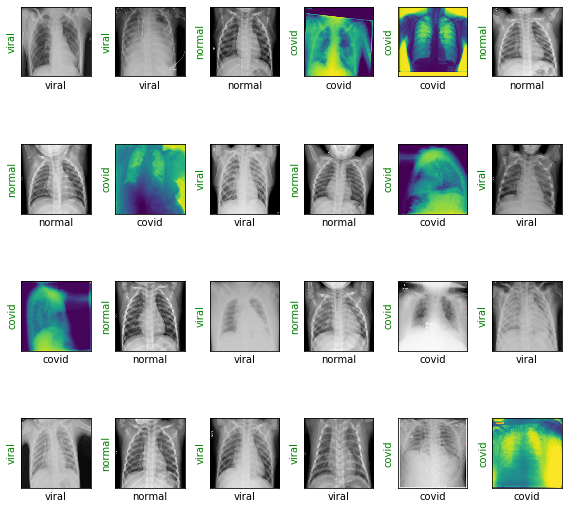

In [21]:
images, labels = next(iter(dl_train))
show_images(images, labels, labels)

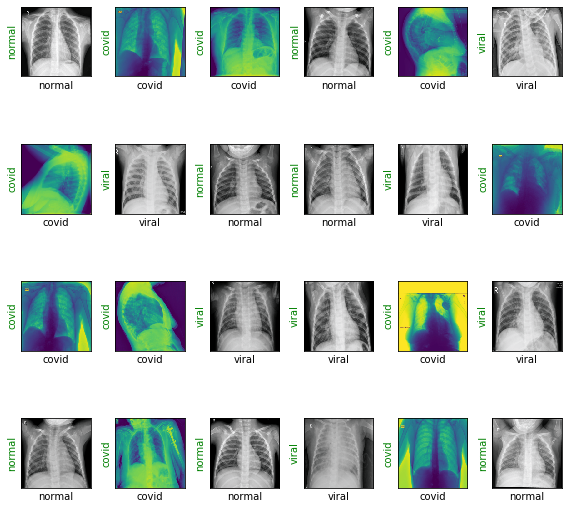

In [22]:
images, labels = next(iter(dl_dev))
show_images(images, labels, labels)

# Creating the Model

In [23]:
resnet18 = torchvision.models.resnet18(pretrained=True)

print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
resnet18.fc = torch.nn.Linear(in_features=512, out_features=3)
loss_fn = torch.nn.CrossEntropyLoss()
loss_fn = loss_fn.to('cuda')
optimizer = torch.optim.Adam(resnet18.parameters(), lr=3e-5)

In [25]:
# resnet18.fc = torch.nn.Sequential(
#     torch.nn.Linear(in_features=512, out_features=3),
#     torch.nn.Dropout(0.5)
# )
# loss_fn = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(resnet18.parameters(), lr=3e-5)

In [26]:
def show_preds():
    resnet18.to('cuda')
    resnet18.eval()
    images, labels = next(iter(dl_dev))
    outputs = resnet18(images.to('cuda')).cpu()
    _, preds = torch.max(outputs, 1)
    show_images(images, labels, preds.cpu())

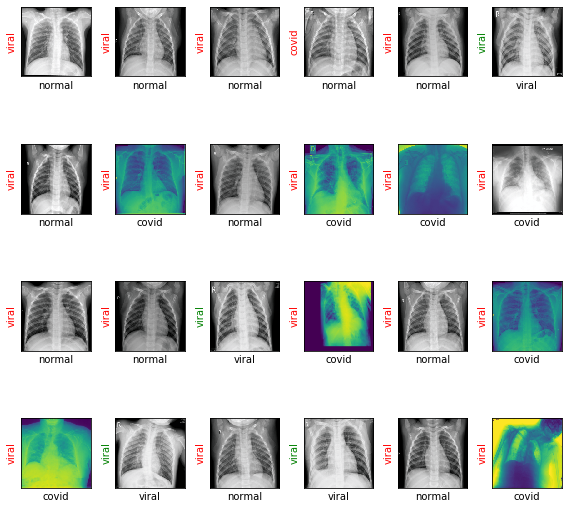

In [27]:
show_preds()

# Training the Model

In [28]:
train_losses = []
train_accuracies = []
dev_losses = []
dev_accuracies = []
def train(epochs):
    resnet18.to('cuda')
    print('Starting training..')
    for e in range(0, epochs):
        print('='*20)
        print(f'Starting epoch {e + 1}/{epochs}')
        print('='*20)

        dev_accuracy = 0.
        train_loss = 0.
        # Model training
        resnet18.train() # set model to training phase
        for train_step, (images, labels) in enumerate(dl_train):
            images = images.to('cuda')
            labels = labels.to('cuda')
            optimizer.zero_grad()
            outputs = resnet18(images)
            outputs = outputs.to('cuda')
            loss = loss_fn(outputs, labels)
            loss = loss.to('cuda')
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            print(f'{train_step}/{len(dl_train)}: Train Loss: {train_loss:.4f}')
            _, preds = torch.max(outputs, 1)
            train_accuracy += sum((np.array(preds.cpu()) == np.array(labels.cpu())))
        
        train_loss /= (train_step + 1)
        train_losses.append(train_loss)
        train_accuracy = train_accuracy/len(train_dataset)
        train_accuracies.append(train_accuracy)
        print(f'Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy}')

        # Model validation
        dev_accuracy = 0
        dev_loss = 0.
        resnet18.eval() # set model to eval phase
        for val_step, (images, labels) in enumerate(dl_dev):
            images = images.to('cuda')
            labels = labels.to('cuda')
            outputs = resnet18(images)
            outputs = outputs.to('cuda')
            loss = loss_fn(outputs, labels)
            loss = loss.to('cuda')
            dev_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            dev_accuracy += sum((np.array(preds.cpu()) == np.array(labels.cpu())))

        dev_loss /= (val_step + 1)
        dev_losses.append(dev_loss)
        dev_accuracy = dev_accuracy/len(dev_dataset)
        dev_accuracies.append(dev_accuracy)
        print(f'Dev Loss: {dev_loss:.4f}, Accuracy: {dev_accuracy:.4f}')

        show_preds()
        resnet18.train() # set model to training phase

        
    print('Training complete...')

True
Starting training..
Starting epoch 1/20
0/135: Train Loss: 1.1936
1/135: Train Loss: 2.3245
2/135: Train Loss: 3.4049
3/135: Train Loss: 4.1034
4/135: Train Loss: 4.9031
5/135: Train Loss: 5.5970
6/135: Train Loss: 6.1785
7/135: Train Loss: 6.6288
8/135: Train Loss: 7.0417
9/135: Train Loss: 7.5063
10/135: Train Loss: 7.8733
11/135: Train Loss: 8.3413
12/135: Train Loss: 8.6423
13/135: Train Loss: 8.9972
14/135: Train Loss: 9.3262
15/135: Train Loss: 9.7140
16/135: Train Loss: 10.1590
17/135: Train Loss: 10.3047
18/135: Train Loss: 10.5295
19/135: Train Loss: 10.8882
20/135: Train Loss: 11.0747
21/135: Train Loss: 11.2221
22/135: Train Loss: 11.5140
23/135: Train Loss: 11.6800
24/135: Train Loss: 11.8932
25/135: Train Loss: 12.1811
26/135: Train Loss: 12.4666
27/135: Train Loss: 12.6090
28/135: Train Loss: 12.7756
29/135: Train Loss: 12.9280
30/135: Train Loss: 13.0619
31/135: Train Loss: 13.2243
32/135: Train Loss: 13.4615
33/135: Train Loss: 13.5322
34/135: Train Loss: 13.8144
3

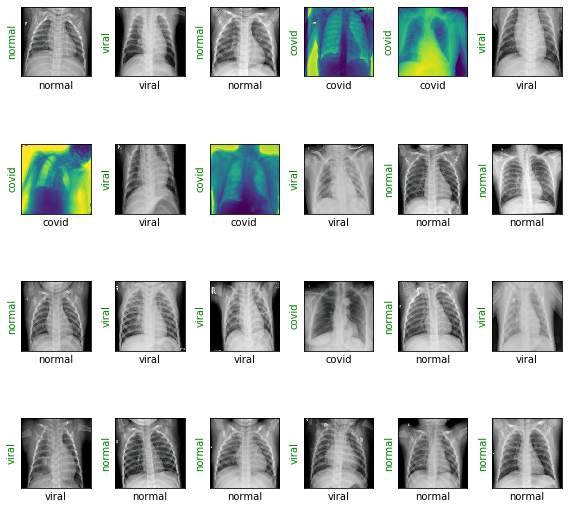

Starting epoch 2/20
0/135: Train Loss: 0.1028
1/135: Train Loss: 0.1794
2/135: Train Loss: 0.1996
3/135: Train Loss: 0.2094
4/135: Train Loss: 0.4280
5/135: Train Loss: 0.6560
6/135: Train Loss: 0.7115
7/135: Train Loss: 0.7206
8/135: Train Loss: 0.7440
9/135: Train Loss: 0.7708
10/135: Train Loss: 0.9135
11/135: Train Loss: 0.9256
12/135: Train Loss: 1.0069
13/135: Train Loss: 1.0274
14/135: Train Loss: 1.0549
15/135: Train Loss: 1.0806
16/135: Train Loss: 1.1647
17/135: Train Loss: 1.2474
18/135: Train Loss: 1.2834
19/135: Train Loss: 1.3055
20/135: Train Loss: 1.3630
21/135: Train Loss: 1.4159
22/135: Train Loss: 1.4556
23/135: Train Loss: 1.4814
24/135: Train Loss: 1.4934
25/135: Train Loss: 1.5092
26/135: Train Loss: 1.5269
27/135: Train Loss: 1.6115
28/135: Train Loss: 1.6222
29/135: Train Loss: 1.6462
30/135: Train Loss: 1.6637
31/135: Train Loss: 1.7026
32/135: Train Loss: 1.7518
33/135: Train Loss: 1.8034
34/135: Train Loss: 1.8612
35/135: Train Loss: 2.0032
36/135: Train Loss

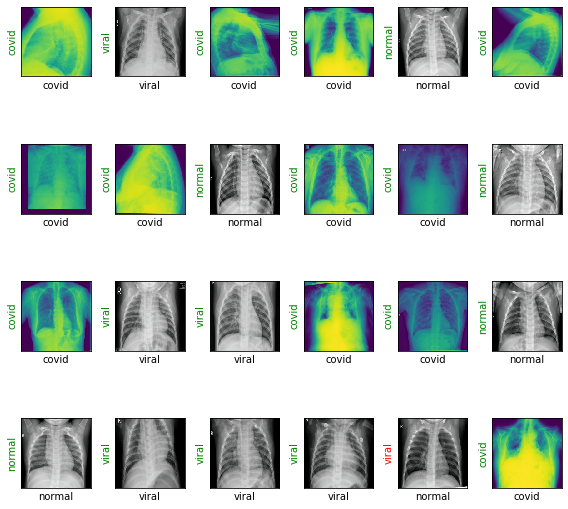

Starting epoch 3/20
0/135: Train Loss: 0.0047
1/135: Train Loss: 0.0316
2/135: Train Loss: 0.0981
3/135: Train Loss: 0.1287
4/135: Train Loss: 0.1780
5/135: Train Loss: 0.1860
6/135: Train Loss: 0.2945
7/135: Train Loss: 0.3805
8/135: Train Loss: 0.3989
9/135: Train Loss: 0.4242
10/135: Train Loss: 0.4467
11/135: Train Loss: 0.5092
12/135: Train Loss: 0.5678
13/135: Train Loss: 0.6238
14/135: Train Loss: 0.6265
15/135: Train Loss: 0.6350
16/135: Train Loss: 0.6419
17/135: Train Loss: 0.6760
18/135: Train Loss: 0.6846
19/135: Train Loss: 0.6995
20/135: Train Loss: 0.7102
21/135: Train Loss: 0.7450
22/135: Train Loss: 0.7480
23/135: Train Loss: 0.7551
24/135: Train Loss: 0.7829
25/135: Train Loss: 0.9007
26/135: Train Loss: 0.9808
27/135: Train Loss: 0.9950
28/135: Train Loss: 1.0056
29/135: Train Loss: 1.0096
30/135: Train Loss: 1.0117
31/135: Train Loss: 1.0224
32/135: Train Loss: 1.0263
33/135: Train Loss: 1.0362
34/135: Train Loss: 1.0901
35/135: Train Loss: 1.0983
36/135: Train Loss

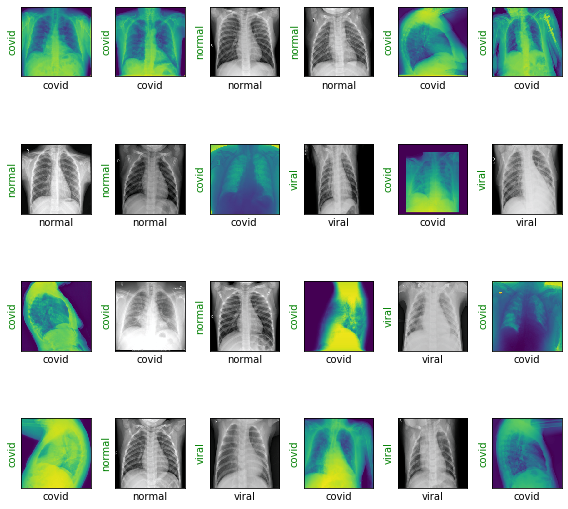

Starting epoch 4/20
0/135: Train Loss: 0.0386
1/135: Train Loss: 0.0823
2/135: Train Loss: 0.0866
3/135: Train Loss: 0.0906
4/135: Train Loss: 0.1020
5/135: Train Loss: 0.1649
6/135: Train Loss: 0.1807
7/135: Train Loss: 0.2064
8/135: Train Loss: 0.2339
9/135: Train Loss: 0.2423
10/135: Train Loss: 0.3074
11/135: Train Loss: 0.3134
12/135: Train Loss: 0.3244
13/135: Train Loss: 0.3273
14/135: Train Loss: 0.3426
15/135: Train Loss: 0.3467
16/135: Train Loss: 0.3531
17/135: Train Loss: 0.3737
18/135: Train Loss: 0.3844
19/135: Train Loss: 0.4112
20/135: Train Loss: 0.4287
21/135: Train Loss: 0.4463
22/135: Train Loss: 0.4505
23/135: Train Loss: 0.4654
24/135: Train Loss: 0.4678
25/135: Train Loss: 0.4724
26/135: Train Loss: 0.4934
27/135: Train Loss: 0.5020
28/135: Train Loss: 0.5109
29/135: Train Loss: 0.5841
30/135: Train Loss: 0.5944
31/135: Train Loss: 0.5977
32/135: Train Loss: 0.6056
33/135: Train Loss: 0.6187
34/135: Train Loss: 0.6236
35/135: Train Loss: 0.6343
36/135: Train Loss

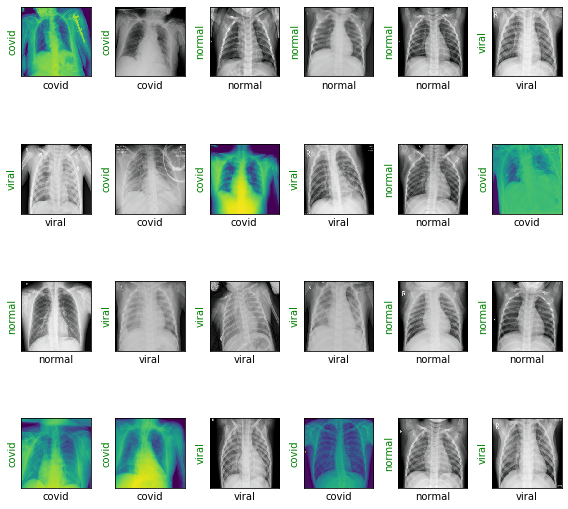

Starting epoch 5/20
0/135: Train Loss: 0.0055
1/135: Train Loss: 0.0106
2/135: Train Loss: 0.0122
3/135: Train Loss: 0.0134
4/135: Train Loss: 0.0180
5/135: Train Loss: 0.0223
6/135: Train Loss: 0.0239
7/135: Train Loss: 0.0274
8/135: Train Loss: 0.0290
9/135: Train Loss: 0.0336
10/135: Train Loss: 0.0422
11/135: Train Loss: 0.0457
12/135: Train Loss: 0.0466
13/135: Train Loss: 0.0581
14/135: Train Loss: 0.0598
15/135: Train Loss: 0.0616
16/135: Train Loss: 0.0640
17/135: Train Loss: 0.0690
18/135: Train Loss: 0.0712
19/135: Train Loss: 0.0722
20/135: Train Loss: 0.1061
21/135: Train Loss: 0.1447
22/135: Train Loss: 0.1458
23/135: Train Loss: 0.1508
24/135: Train Loss: 0.1951
25/135: Train Loss: 0.2037
26/135: Train Loss: 0.2239
27/135: Train Loss: 0.2247
28/135: Train Loss: 0.2277
29/135: Train Loss: 0.2301
30/135: Train Loss: 0.2309
31/135: Train Loss: 0.2359
32/135: Train Loss: 0.2406
33/135: Train Loss: 0.2414
34/135: Train Loss: 0.2453
35/135: Train Loss: 0.2463
36/135: Train Loss

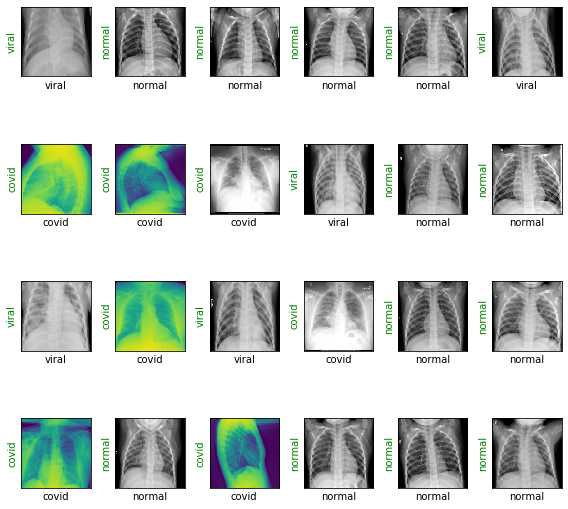

Starting epoch 6/20
0/135: Train Loss: 0.0009
1/135: Train Loss: 0.0016
2/135: Train Loss: 0.0060
3/135: Train Loss: 0.0214
4/135: Train Loss: 0.0259
5/135: Train Loss: 0.0292
6/135: Train Loss: 0.0303
7/135: Train Loss: 0.0356
8/135: Train Loss: 0.0409
9/135: Train Loss: 0.0482
10/135: Train Loss: 0.0517
11/135: Train Loss: 0.0541
12/135: Train Loss: 0.0560
13/135: Train Loss: 0.0671
14/135: Train Loss: 0.0708
15/135: Train Loss: 0.0753
16/135: Train Loss: 0.0829
17/135: Train Loss: 0.0851
18/135: Train Loss: 0.0922
19/135: Train Loss: 0.1023
20/135: Train Loss: 0.1809
21/135: Train Loss: 0.1840
22/135: Train Loss: 0.1877
23/135: Train Loss: 0.1924
24/135: Train Loss: 0.2001
25/135: Train Loss: 0.2070
26/135: Train Loss: 0.2175
27/135: Train Loss: 0.2219
28/135: Train Loss: 0.2505
29/135: Train Loss: 0.2560
30/135: Train Loss: 0.2583
31/135: Train Loss: 0.2612
32/135: Train Loss: 0.2631
33/135: Train Loss: 0.2655
34/135: Train Loss: 0.2736
35/135: Train Loss: 0.2809
36/135: Train Loss

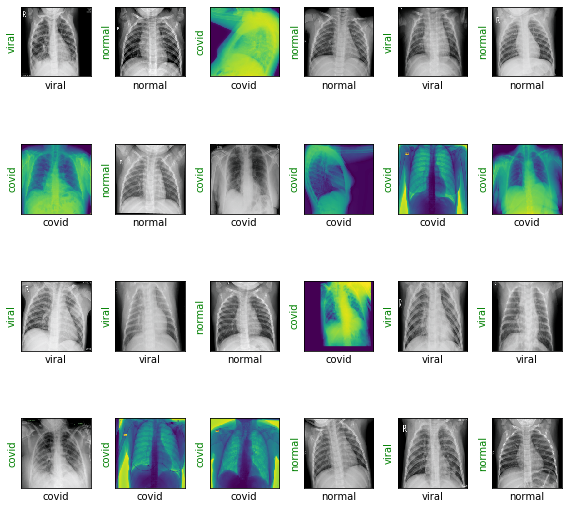

Starting epoch 7/20
0/135: Train Loss: 0.0012
1/135: Train Loss: 0.0052
2/135: Train Loss: 0.0183
3/135: Train Loss: 0.0191
4/135: Train Loss: 0.0213
5/135: Train Loss: 0.0262
6/135: Train Loss: 0.0278
7/135: Train Loss: 0.0354
8/135: Train Loss: 0.0359
9/135: Train Loss: 0.0376
10/135: Train Loss: 0.0393
11/135: Train Loss: 0.0552
12/135: Train Loss: 0.0574
13/135: Train Loss: 0.0584
14/135: Train Loss: 0.0621
15/135: Train Loss: 0.1108
16/135: Train Loss: 0.1148
17/135: Train Loss: 0.1152
18/135: Train Loss: 0.1161
19/135: Train Loss: 0.1173
20/135: Train Loss: 0.1835
21/135: Train Loss: 0.1891
22/135: Train Loss: 0.1906
23/135: Train Loss: 0.1917
24/135: Train Loss: 0.1941
25/135: Train Loss: 0.1964
26/135: Train Loss: 0.1974
27/135: Train Loss: 0.1982
28/135: Train Loss: 0.2784
29/135: Train Loss: 0.2810
30/135: Train Loss: 0.2820
31/135: Train Loss: 0.2883
32/135: Train Loss: 0.2904
33/135: Train Loss: 0.3270
34/135: Train Loss: 0.3287
35/135: Train Loss: 0.3452
36/135: Train Loss

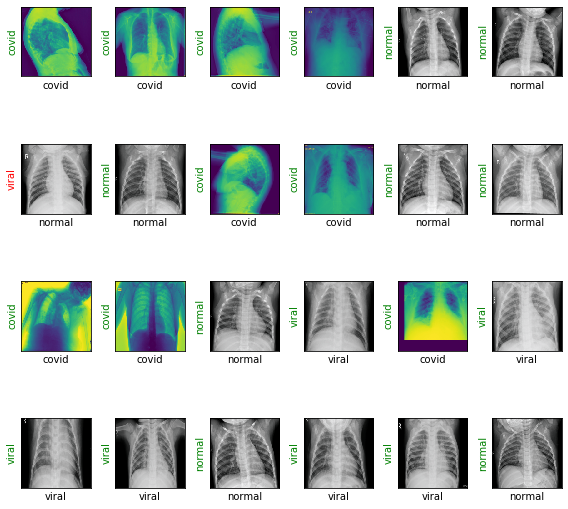

Starting epoch 8/20
0/135: Train Loss: 0.0017
1/135: Train Loss: 0.0029
2/135: Train Loss: 0.0061
3/135: Train Loss: 0.0065
4/135: Train Loss: 0.0080
5/135: Train Loss: 0.0121
6/135: Train Loss: 0.0125
7/135: Train Loss: 0.0131
8/135: Train Loss: 0.0134
9/135: Train Loss: 0.0177
10/135: Train Loss: 0.0181
11/135: Train Loss: 0.0190
12/135: Train Loss: 0.0211
13/135: Train Loss: 0.0250
14/135: Train Loss: 0.0260
15/135: Train Loss: 0.0277
16/135: Train Loss: 0.0293
17/135: Train Loss: 0.0299
18/135: Train Loss: 0.0309
19/135: Train Loss: 0.0314
20/135: Train Loss: 0.0328
21/135: Train Loss: 0.0385
22/135: Train Loss: 0.0506
23/135: Train Loss: 0.0519
24/135: Train Loss: 0.0527
25/135: Train Loss: 0.0529
26/135: Train Loss: 0.0569
27/135: Train Loss: 0.0612
28/135: Train Loss: 0.0638
29/135: Train Loss: 0.0643
30/135: Train Loss: 0.0656
31/135: Train Loss: 0.0658
32/135: Train Loss: 0.0674
33/135: Train Loss: 0.0680
34/135: Train Loss: 0.0701
35/135: Train Loss: 0.0713
36/135: Train Loss

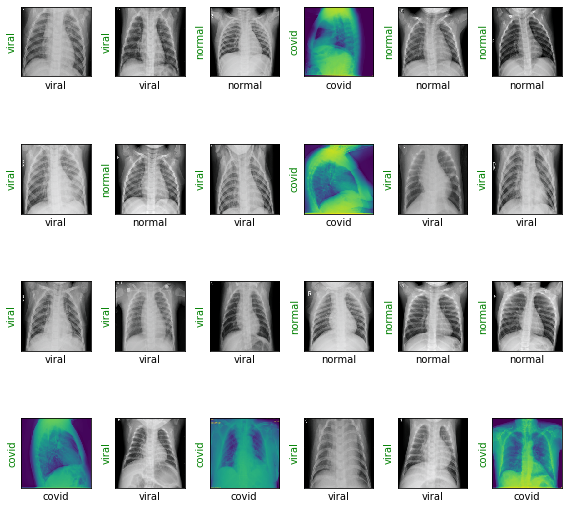

Starting epoch 9/20
0/135: Train Loss: 0.0011
1/135: Train Loss: 0.0019
2/135: Train Loss: 0.0025
3/135: Train Loss: 0.0045
4/135: Train Loss: 0.0054
5/135: Train Loss: 0.0072
6/135: Train Loss: 0.0082
7/135: Train Loss: 0.0087
8/135: Train Loss: 0.0098
9/135: Train Loss: 0.0108
10/135: Train Loss: 0.0118
11/135: Train Loss: 0.0126
12/135: Train Loss: 0.0221
13/135: Train Loss: 0.0228
14/135: Train Loss: 0.0233
15/135: Train Loss: 0.0236
16/135: Train Loss: 0.0240
17/135: Train Loss: 0.0245
18/135: Train Loss: 0.0255
19/135: Train Loss: 0.0260
20/135: Train Loss: 0.0325
21/135: Train Loss: 0.0341
22/135: Train Loss: 0.0355
23/135: Train Loss: 0.0363
24/135: Train Loss: 0.0365
25/135: Train Loss: 0.0371
26/135: Train Loss: 0.0462
27/135: Train Loss: 0.0465
28/135: Train Loss: 0.0473
29/135: Train Loss: 0.0479
30/135: Train Loss: 0.1761
31/135: Train Loss: 0.1768
32/135: Train Loss: 0.1806
33/135: Train Loss: 0.1808
34/135: Train Loss: 0.1811
35/135: Train Loss: 0.1820
36/135: Train Loss

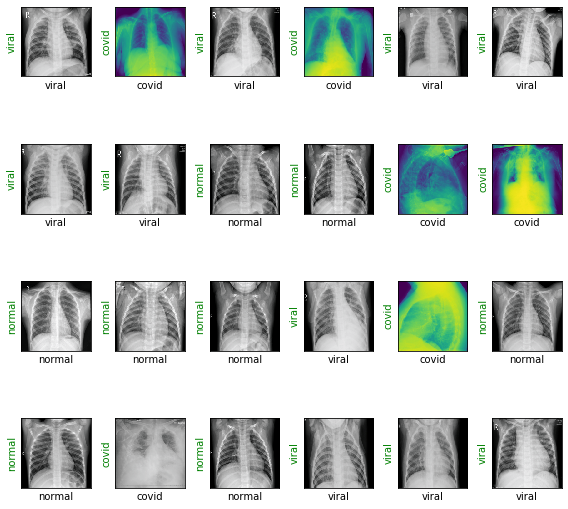

Starting epoch 10/20
0/135: Train Loss: 0.0029
1/135: Train Loss: 0.0032
2/135: Train Loss: 0.0053
3/135: Train Loss: 0.0080
4/135: Train Loss: 0.0101
5/135: Train Loss: 0.0118
6/135: Train Loss: 0.0122
7/135: Train Loss: 0.0266
8/135: Train Loss: 0.0272
9/135: Train Loss: 0.0274
10/135: Train Loss: 0.0280
11/135: Train Loss: 0.0337
12/135: Train Loss: 0.0344
13/135: Train Loss: 0.0346
14/135: Train Loss: 0.0361
15/135: Train Loss: 0.0379
16/135: Train Loss: 0.0404
17/135: Train Loss: 0.0411
18/135: Train Loss: 0.0432
19/135: Train Loss: 0.0448
20/135: Train Loss: 0.0459
21/135: Train Loss: 0.0462
22/135: Train Loss: 0.0628
23/135: Train Loss: 0.0632
24/135: Train Loss: 0.0644
25/135: Train Loss: 0.0649
26/135: Train Loss: 0.0662
27/135: Train Loss: 0.0712
28/135: Train Loss: 0.0750
29/135: Train Loss: 0.0771
30/135: Train Loss: 0.0776
31/135: Train Loss: 0.0809
32/135: Train Loss: 0.0818
33/135: Train Loss: 0.0826
34/135: Train Loss: 0.0835
35/135: Train Loss: 0.0843
36/135: Train Los

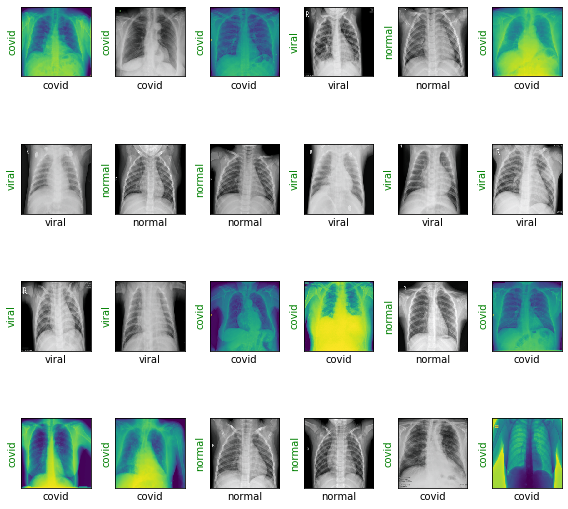

Starting epoch 11/20
0/135: Train Loss: 0.0003
1/135: Train Loss: 0.0012
2/135: Train Loss: 0.0017
3/135: Train Loss: 0.0050
4/135: Train Loss: 0.0056
5/135: Train Loss: 0.0078
6/135: Train Loss: 0.0091
7/135: Train Loss: 0.0272
8/135: Train Loss: 0.0296
9/135: Train Loss: 0.0299
10/135: Train Loss: 0.0625
11/135: Train Loss: 0.0628
12/135: Train Loss: 0.0634
13/135: Train Loss: 0.0653
14/135: Train Loss: 0.0657
15/135: Train Loss: 0.0661
16/135: Train Loss: 0.0663
17/135: Train Loss: 0.0672
18/135: Train Loss: 0.0675
19/135: Train Loss: 0.0767
20/135: Train Loss: 0.0784
21/135: Train Loss: 0.0789
22/135: Train Loss: 0.0793
23/135: Train Loss: 0.0801
24/135: Train Loss: 0.0833
25/135: Train Loss: 0.0848
26/135: Train Loss: 0.0866
27/135: Train Loss: 0.0880
28/135: Train Loss: 0.0884
29/135: Train Loss: 0.0892
30/135: Train Loss: 0.0903
31/135: Train Loss: 0.0907
32/135: Train Loss: 0.0914
33/135: Train Loss: 0.0933
34/135: Train Loss: 0.0934
35/135: Train Loss: 0.0941
36/135: Train Los

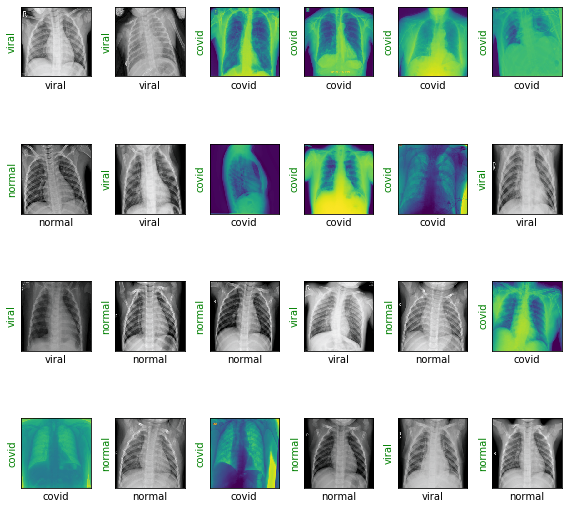

Starting epoch 12/20
0/135: Train Loss: 0.0003
1/135: Train Loss: 0.0009
2/135: Train Loss: 0.0014
3/135: Train Loss: 0.0016
4/135: Train Loss: 0.0052
5/135: Train Loss: 0.0054
6/135: Train Loss: 0.0058
7/135: Train Loss: 0.0095
8/135: Train Loss: 0.0099
9/135: Train Loss: 0.0209
10/135: Train Loss: 0.0214
11/135: Train Loss: 0.0218
12/135: Train Loss: 0.0244
13/135: Train Loss: 0.0259
14/135: Train Loss: 0.0272
15/135: Train Loss: 0.0284
16/135: Train Loss: 0.0369
17/135: Train Loss: 0.0418
18/135: Train Loss: 0.0431
19/135: Train Loss: 0.0442
20/135: Train Loss: 0.0447
21/135: Train Loss: 0.0453
22/135: Train Loss: 0.0478
23/135: Train Loss: 0.0479
24/135: Train Loss: 0.0483
25/135: Train Loss: 0.0489
26/135: Train Loss: 0.0493
27/135: Train Loss: 0.0498
28/135: Train Loss: 0.0512
29/135: Train Loss: 0.0522
30/135: Train Loss: 0.0527
31/135: Train Loss: 0.0533
32/135: Train Loss: 0.0545
33/135: Train Loss: 0.0548
34/135: Train Loss: 0.0558
35/135: Train Loss: 0.0570
36/135: Train Los

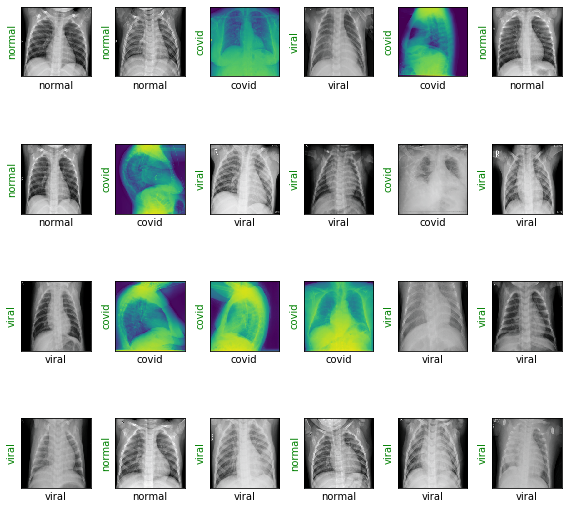

Starting epoch 13/20
0/135: Train Loss: 0.0022
1/135: Train Loss: 0.0058
2/135: Train Loss: 0.0073
3/135: Train Loss: 0.0303
4/135: Train Loss: 0.0311
5/135: Train Loss: 0.0323
6/135: Train Loss: 0.0330
7/135: Train Loss: 0.0354
8/135: Train Loss: 0.0360
9/135: Train Loss: 0.0363
10/135: Train Loss: 0.0376
11/135: Train Loss: 0.0378
12/135: Train Loss: 0.0380
13/135: Train Loss: 0.0398
14/135: Train Loss: 0.0399
15/135: Train Loss: 0.0412
16/135: Train Loss: 0.0413
17/135: Train Loss: 0.0417
18/135: Train Loss: 0.0926
19/135: Train Loss: 0.0938
20/135: Train Loss: 0.0940
21/135: Train Loss: 0.0946
22/135: Train Loss: 0.1418
23/135: Train Loss: 0.1419
24/135: Train Loss: 0.1421
25/135: Train Loss: 0.1424
26/135: Train Loss: 0.1429
27/135: Train Loss: 0.1432
28/135: Train Loss: 0.1453
29/135: Train Loss: 0.1468
30/135: Train Loss: 0.1475
31/135: Train Loss: 0.1479
32/135: Train Loss: 0.1480
33/135: Train Loss: 0.1484
34/135: Train Loss: 0.1486
35/135: Train Loss: 0.1492
36/135: Train Los

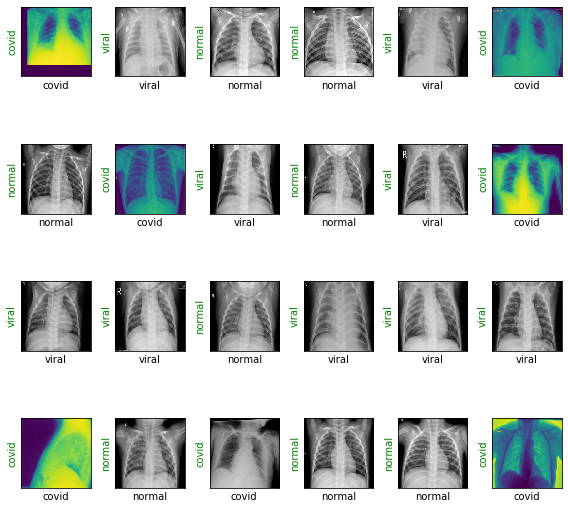

Starting epoch 14/20
0/135: Train Loss: 0.0010
1/135: Train Loss: 0.0017
2/135: Train Loss: 0.0053
3/135: Train Loss: 0.2058
4/135: Train Loss: 0.2094
5/135: Train Loss: 0.2117
6/135: Train Loss: 0.2158
7/135: Train Loss: 0.2163
8/135: Train Loss: 0.2174
9/135: Train Loss: 0.2178
10/135: Train Loss: 0.2181
11/135: Train Loss: 0.2224
12/135: Train Loss: 0.2824
13/135: Train Loss: 0.3089
14/135: Train Loss: 0.3095
15/135: Train Loss: 0.3159
16/135: Train Loss: 0.3172
17/135: Train Loss: 0.3175
18/135: Train Loss: 0.3190
19/135: Train Loss: 0.3203
20/135: Train Loss: 0.3326
21/135: Train Loss: 0.3341
22/135: Train Loss: 0.3359
23/135: Train Loss: 0.3771
24/135: Train Loss: 0.3801
25/135: Train Loss: 0.3808
26/135: Train Loss: 0.3953
27/135: Train Loss: 0.3959
28/135: Train Loss: 0.3969
29/135: Train Loss: 0.4035
30/135: Train Loss: 0.4042
31/135: Train Loss: 0.4087
32/135: Train Loss: 0.4097
33/135: Train Loss: 0.4142
34/135: Train Loss: 0.4184
35/135: Train Loss: 0.4195
36/135: Train Los

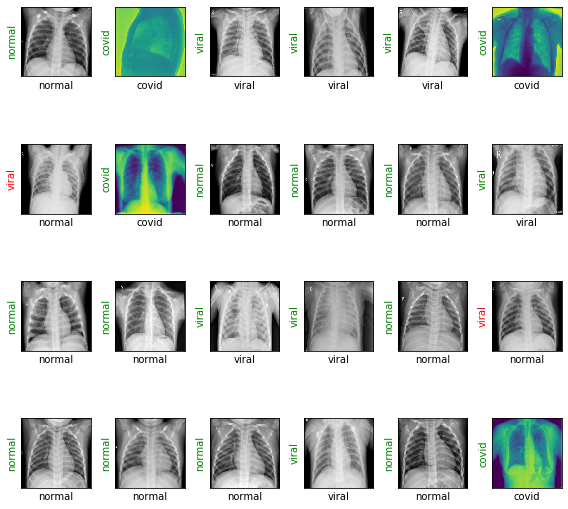

Starting epoch 15/20
0/135: Train Loss: 0.0011
1/135: Train Loss: 0.0020
2/135: Train Loss: 0.0022
3/135: Train Loss: 0.0026
4/135: Train Loss: 0.0028
5/135: Train Loss: 0.0031
6/135: Train Loss: 0.0040
7/135: Train Loss: 0.0050
8/135: Train Loss: 0.0062
9/135: Train Loss: 0.0077
10/135: Train Loss: 0.0081
11/135: Train Loss: 0.0237
12/135: Train Loss: 0.0243
13/135: Train Loss: 0.0295
14/135: Train Loss: 0.0299
15/135: Train Loss: 0.0302
16/135: Train Loss: 0.0305
17/135: Train Loss: 0.0306
18/135: Train Loss: 0.0321
19/135: Train Loss: 0.0324
20/135: Train Loss: 0.0328
21/135: Train Loss: 0.0334
22/135: Train Loss: 0.0357
23/135: Train Loss: 0.0367
24/135: Train Loss: 0.0372
25/135: Train Loss: 0.0374
26/135: Train Loss: 0.0386
27/135: Train Loss: 0.0391
28/135: Train Loss: 0.0393
29/135: Train Loss: 0.0400
30/135: Train Loss: 0.0611
31/135: Train Loss: 0.0615
32/135: Train Loss: 0.0626
33/135: Train Loss: 0.0644
34/135: Train Loss: 0.0659
35/135: Train Loss: 0.0660
36/135: Train Los

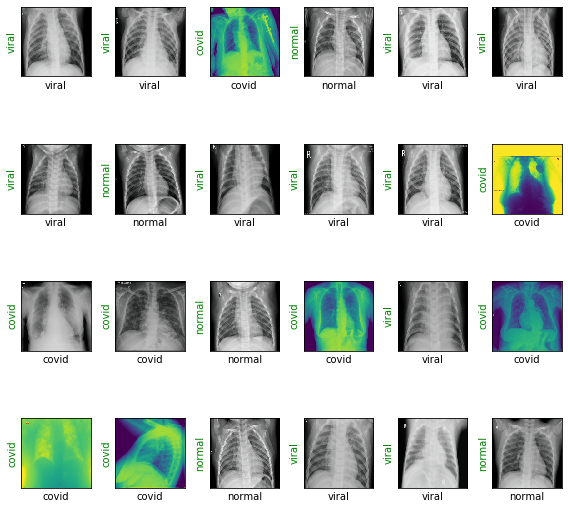

Starting epoch 16/20
0/135: Train Loss: 0.0023
1/135: Train Loss: 0.0049
2/135: Train Loss: 0.0056
3/135: Train Loss: 0.0183
4/135: Train Loss: 0.0189
5/135: Train Loss: 0.0209
6/135: Train Loss: 0.0215
7/135: Train Loss: 0.0230
8/135: Train Loss: 0.0560
9/135: Train Loss: 0.0572
10/135: Train Loss: 0.0576
11/135: Train Loss: 0.0597
12/135: Train Loss: 0.0602
13/135: Train Loss: 0.0620
14/135: Train Loss: 0.0636
15/135: Train Loss: 0.0655
16/135: Train Loss: 0.0669
17/135: Train Loss: 0.1262
18/135: Train Loss: 0.1285
19/135: Train Loss: 0.1297
20/135: Train Loss: 0.1359
21/135: Train Loss: 0.1362
22/135: Train Loss: 0.1398
23/135: Train Loss: 0.1423
24/135: Train Loss: 0.1553
25/135: Train Loss: 0.1575
26/135: Train Loss: 0.1578
27/135: Train Loss: 0.1668
28/135: Train Loss: 0.1764
29/135: Train Loss: 0.1786
30/135: Train Loss: 0.1791
31/135: Train Loss: 0.1805
32/135: Train Loss: 0.2000
33/135: Train Loss: 0.2260
34/135: Train Loss: 0.2287
35/135: Train Loss: 0.2325
36/135: Train Los

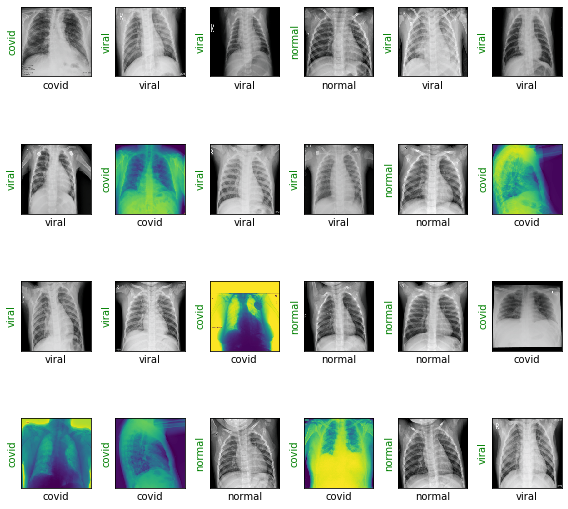

Starting epoch 17/20
0/135: Train Loss: 0.0005
1/135: Train Loss: 0.0030
2/135: Train Loss: 0.0060
3/135: Train Loss: 0.0063
4/135: Train Loss: 0.0073
5/135: Train Loss: 0.0074
6/135: Train Loss: 0.0077
7/135: Train Loss: 0.0079
8/135: Train Loss: 0.0084
9/135: Train Loss: 0.0108
10/135: Train Loss: 0.0111
11/135: Train Loss: 0.0117
12/135: Train Loss: 0.0123
13/135: Train Loss: 0.0133
14/135: Train Loss: 0.0146
15/135: Train Loss: 0.0198
16/135: Train Loss: 0.0703
17/135: Train Loss: 0.0770
18/135: Train Loss: 0.0776
19/135: Train Loss: 0.0789
20/135: Train Loss: 0.0796
21/135: Train Loss: 0.0797
22/135: Train Loss: 0.0826
23/135: Train Loss: 0.0870
24/135: Train Loss: 0.1026
25/135: Train Loss: 0.1127
26/135: Train Loss: 0.1134
27/135: Train Loss: 0.1164
28/135: Train Loss: 0.1181
29/135: Train Loss: 0.1189
30/135: Train Loss: 0.1198
31/135: Train Loss: 0.1332
32/135: Train Loss: 0.1337
33/135: Train Loss: 0.1360
34/135: Train Loss: 0.1363
35/135: Train Loss: 0.1371
36/135: Train Los

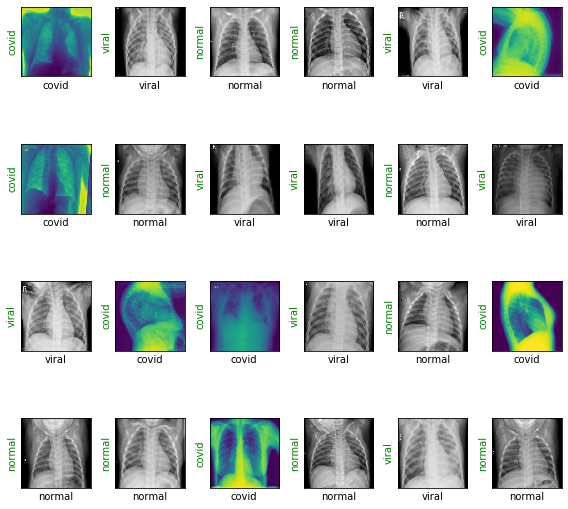

Starting epoch 18/20
0/135: Train Loss: 0.0004
1/135: Train Loss: 0.0016
2/135: Train Loss: 0.0017
3/135: Train Loss: 0.0019
4/135: Train Loss: 0.0023
5/135: Train Loss: 0.0041
6/135: Train Loss: 0.0046
7/135: Train Loss: 0.0055
8/135: Train Loss: 0.0056
9/135: Train Loss: 0.0058
10/135: Train Loss: 0.0059
11/135: Train Loss: 0.0063
12/135: Train Loss: 0.0064
13/135: Train Loss: 0.0066
14/135: Train Loss: 0.0071
15/135: Train Loss: 0.0074
16/135: Train Loss: 0.0075
17/135: Train Loss: 0.0076
18/135: Train Loss: 0.0078
19/135: Train Loss: 0.0080
20/135: Train Loss: 0.0084
21/135: Train Loss: 0.0087
22/135: Train Loss: 0.0110
23/135: Train Loss: 0.0111
24/135: Train Loss: 0.0113
25/135: Train Loss: 0.0118
26/135: Train Loss: 0.0281
27/135: Train Loss: 0.0282
28/135: Train Loss: 0.0283
29/135: Train Loss: 0.0287
30/135: Train Loss: 0.0288
31/135: Train Loss: 0.0289
32/135: Train Loss: 0.0289
33/135: Train Loss: 0.0305
34/135: Train Loss: 0.0308
35/135: Train Loss: 0.0311
36/135: Train Los

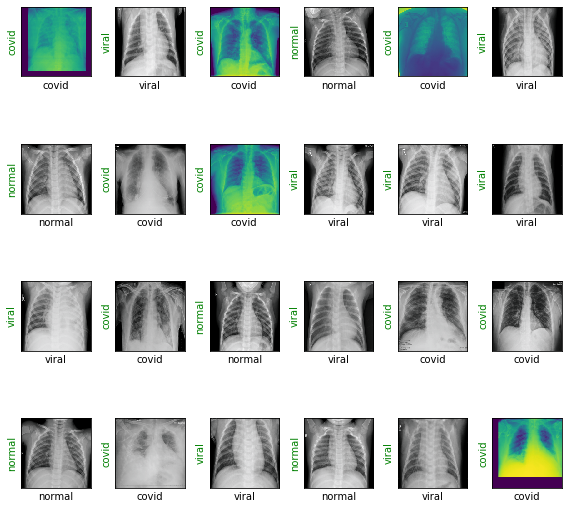

Starting epoch 19/20
0/135: Train Loss: 0.0001
1/135: Train Loss: 0.0007
2/135: Train Loss: 0.0024
3/135: Train Loss: 0.0125
4/135: Train Loss: 0.0147
5/135: Train Loss: 0.0290
6/135: Train Loss: 0.0328
7/135: Train Loss: 0.0330
8/135: Train Loss: 0.0372
9/135: Train Loss: 0.0441
10/135: Train Loss: 0.0734
11/135: Train Loss: 0.0955
12/135: Train Loss: 0.0971
13/135: Train Loss: 0.1243
14/135: Train Loss: 0.1276
15/135: Train Loss: 0.1461
16/135: Train Loss: 0.1475
17/135: Train Loss: 0.1483
18/135: Train Loss: 0.1520
19/135: Train Loss: 0.1531
20/135: Train Loss: 0.1656
21/135: Train Loss: 0.2019
22/135: Train Loss: 0.2074
23/135: Train Loss: 0.2674
24/135: Train Loss: 0.2721
25/135: Train Loss: 0.2828
26/135: Train Loss: 0.2832
27/135: Train Loss: 0.2845
28/135: Train Loss: 0.2854
29/135: Train Loss: 0.2876
30/135: Train Loss: 0.2918
31/135: Train Loss: 0.2954
32/135: Train Loss: 0.2975
33/135: Train Loss: 0.2992
34/135: Train Loss: 0.2996
35/135: Train Loss: 0.3082
36/135: Train Los

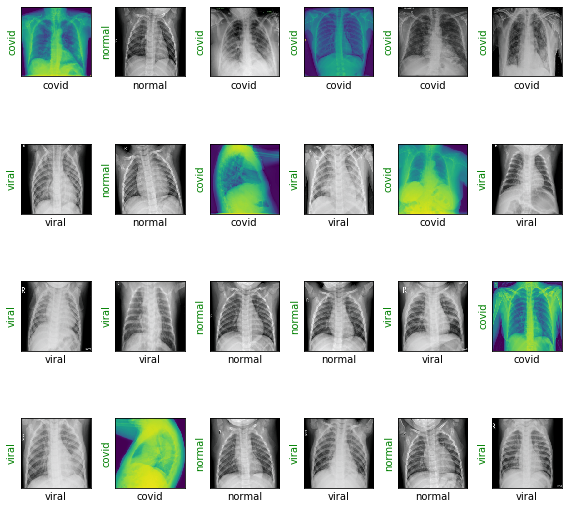

Starting epoch 20/20
0/135: Train Loss: 0.0004
1/135: Train Loss: 0.0017
2/135: Train Loss: 0.0038
3/135: Train Loss: 0.0166
4/135: Train Loss: 0.0169
5/135: Train Loss: 0.0230
6/135: Train Loss: 0.0234
7/135: Train Loss: 0.0236
8/135: Train Loss: 0.0248
9/135: Train Loss: 0.0547
10/135: Train Loss: 0.0550
11/135: Train Loss: 0.0577
12/135: Train Loss: 0.0587
13/135: Train Loss: 0.0594
14/135: Train Loss: 0.0603
15/135: Train Loss: 0.0611
16/135: Train Loss: 0.0629
17/135: Train Loss: 0.0635
18/135: Train Loss: 0.0747
19/135: Train Loss: 0.0841
20/135: Train Loss: 0.0850
21/135: Train Loss: 0.0858
22/135: Train Loss: 0.0866
23/135: Train Loss: 0.0871
24/135: Train Loss: 0.0935
25/135: Train Loss: 0.0938
26/135: Train Loss: 0.0984
27/135: Train Loss: 0.0989
28/135: Train Loss: 0.0996
29/135: Train Loss: 0.1003
30/135: Train Loss: 0.1019
31/135: Train Loss: 0.1029
32/135: Train Loss: 0.1031
33/135: Train Loss: 0.1033
34/135: Train Loss: 0.1034
35/135: Train Loss: 0.1037
36/135: Train Los

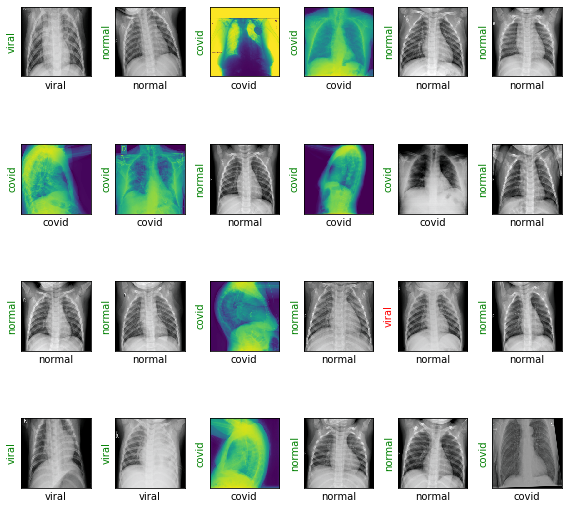

Training complete..
CPU times: user 6h 4min 58s, sys: 38min 8s, total: 6h 43min 7s
Wall time: 5h 11min 51s


In [29]:
%%time
print(torch.cuda.is_available())

torch.cuda.set_device(0)
# On device 0
with torch.cuda.device(0):
    train(epochs=20)

# Final Results

## Show the training/dev curve

Text(0.5, 0, '# epochs')

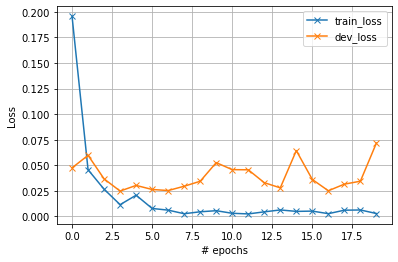

In [30]:
train_dev_loss_df = pd.DataFrame({'train_loss': train_losses, 'dev_loss': dev_losses})
ax = train_dev_loss_df.plot(marker='x', grid=True)
ax.set_ylabel('Loss')
ax.set_xlabel('# epochs')

Save to csv

In [31]:
train_dev_loss_df.to_csv('train_dev_loss_reference_balanced.csv')

## Mismatched examples analysis

- train

In [91]:
resnet18.eval()
labels_all = []
preds_all = []
for i, (images, labels) in enumerate(dl_train):
    print(i)
    output = resnet18(images.to('cuda')).cpu()
    _, preds = torch.max(output, 1)
    labels_all += labels
    preds_all += preds

train_comparison_df = pd.DataFrame(labels_all).rename(columns={0: 'labels'})
train_comparison_df['preds'] = [int(preds_all_el) for preds_all_el in preds_all]
train_comparison_df['misclassified'] = train_comparison_df.apply(lambda col: col['labels'] != col['preds'], axis=1)
train_comparison_df.head()

KeyboardInterrupt: 

In [42]:
train_comparison_df[train_comparison_df['misclassified'] == True]

Empty DataFrame
Columns: [labels, preds, misclassified]
Index: []

In [43]:
train_accuracy = sum(np.array(labels_all) == np.array(preds_all)) / len(preds_all)
print('Train accuracy is %.4f' % train_accuracy)

Train accuracy is 1.0000


- test

In [32]:
resnet18.eval()
labels_all = []
preds_all = []
for i, (images, labels) in enumerate(dl_test):
    output = resnet18(images.to('cuda')).cpu()
    _, preds = torch.max(output, 1)
    labels_all += labels
    preds_all += preds

comparison_df = pd.DataFrame(labels_all).rename(columns={0: 'labels'})
comparison_df['preds'] = [int(preds_all_el) for preds_all_el in preds_all]
comparison_df['misclassified'] = comparison_df.apply(lambda col: col['labels'] != col['preds'], axis=1)
comparison_df.head()

labels  preds  misclassified
0       2      2          False
1       1      1          False
2       0      0          False
3       1      1          False
4       0      0          False

Display mismatched examples

In [34]:
comparison_df[comparison_df['misclassified'] == True]

labels  preds  misclassified
17        0      1           True
33        0      1           True
44        0      1           True
48        0      1           True
52        0      1           True
92        0      1           True
93        0      1           True
111       0      1           True
113       0      1           True
149       0      1           True
151       0      1           True
180       1      0           True
221       0      1           True
233       1      0           True
303       0      1           True
357       0      1           True

Save to file

In [35]:
comparison_df.to_csv('misclassified_reference_balanced.csv')

## Test Accuracy

In [36]:
test_accuracy = sum(np.array(labels_all) == np.array(preds_all)) / len(preds_all)
print('Test accuracy is %.4f' % test_accuracy)

Test accuracy is 0.9605


In [ ]:
training_dev_accuracy_df = pd.DataFrame({'training_accuracy': train_accuracies, 'dev_accuracy': dev_accuracies})
training_dev_accuracy_df.tail()

# Confusion Matrix

In [37]:
resnet18.eval() # set model to eval phase

nb_classes = 3

with torch.no_grad():
    confusion_matrix = torch.zeros(nb_classes, nb_classes)
    for i, (images, labels) in enumerate(dl_test):
        outputs = resnet18(images.to('cuda')).cpu()
        _, preds = torch.max(outputs, 1)
        for t, p in zip(labels.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

confusion_matrix_df = pd.DataFrame(confusion_matrix.numpy(), columns=class_names, index=class_names)
confusion_matrix_df

normal  viral  covid
normal   121.0   14.0    0.0
viral      2.0  133.0    0.0
covid      0.0    0.0  135.0

Save to csv

In [38]:
confusion_matrix_df.to_csv('confusion_matrix_reference_balanced.csv')

## Save model

In [33]:
torch.save(resnet18.state_dict(), 'reference_balanced.pth')

## Load model

In [103]:
resnet18 = torchvision.models.resnet18(pretrained=False)
resnet18.fc = torch.nn.Linear(in_features=512, out_features=3)
resnet18.load_state_dict(torch.load('reference_balanced.pth'))
resnet18.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Calculate Embedding for each COVID Image

In [ ]:
# https://becominghuman.ai/extract-a-feature-vector-for-any-image-with-pytorch-9717561d1d4c
import torchvision.transforms as transforms
from torch.autograd import Variable

resnet18.eval()
resnet18.to('cpu')

scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

def get_embedding(image_name):
    # 1. Load the image with Pillow library
    img = Image.open(image_name)
    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    embedding = {}
    # 4. Define a function that will copy the output of a layer
    def copy_data_to_dict(m, i, o):
        embedding['out'] = o.data
    # 5. Attach that function to our selected layer
    h = resnet18._modules.get('avgpool').register_forward_hook(copy_data_to_dict)
    # 6. Run the model on our transformed image
    resnet18(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return embedding['out']

x = get_embedding(covid_df.at[0, 'PATH'])
x.numpy().squeeze().shape

## Find Cosine-similar images

In [ ]:
# Using PyTorch Cosine Similarity
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
cos_sim = cos(pic_one_vector.unsqueeze(0),
              pic_two_vector.unsqueeze(0))
print('\nCosine similarity: {0}\n'.format(cos_sim))

## Display Top 5 Images